### Image Compression with K-means Clustering implementation

Using the K-means algorithm for image compression. It's done by reducing
the number of colors that occur in an image to only those  most
common ones in that image.
<img src="./images/eiffel_tower.png" width="400" />

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import warnings; warnings.simplefilter('ignore')

#### Step1: Find Closest Centroids

In [4]:
def  findClosestCentroids(X, centroids):
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0],1), dtype=int)
    
    for i in range(X.shape[0]):
        distances = np.zeros((K,1))
        for j in range(K):
            distances[j] = np.sqrt(np.sum( (X[i,:] - centroids[j,:])**2 ))
        idx[i] = np.argmin(distances)
    return idx

idx = findClosestCentroids(X, initial_centroids)

#### Step2: Compute Means

In [5]:
def computeCentroids(X, idx, K):
    (m,n) = X.shape
    centroids = np.zeros((K,n))
    
    for i in range(K):
        C_K = 0
        for j in range(m):
            if (idx[j] ==i):
                centroids[i,:] = centroids[i,:] + X[j,:]
                C_K=C_K+1
        centroids[i,:] = centroids[i,:]/C_K
    return centroids
        
centroids = computeCentroids(X, idx, K)    

#### Step3: K-Means Clustering 

In [6]:
def runkMeans(X, centroids, max_iters):

    K = centroids.shape[0]
    idx = None

    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
    return centroids, idx

Using these 3 functions , the path of updated centroids can be obtained and is visualized (with extra codes) below:
<img src="./images/K-means-visu.png" width="600" />

#### Image compression

In [10]:
def kMeansInitCentroids(X, K):
    import random
    centroids = np.zeros((K,X.shape[1]))
    li = list(range(X.shape[0]))
    random.shuffle(li)
    centroids = X[li[:K]]
    return centroids

A = plt.imread('./data/eiffel-tower.jpg')
size1, size2 = A.shape[0], A.shape[1]
X =(A/255).reshape(-1,3)
K = 16
max_iters = 10
initial_centroids = kMeansInitCentroids(X, K)
centroids, idx = runkMeans(X, initial_centroids, max_iters)
idx = findClosestCentroids(X, centroids)

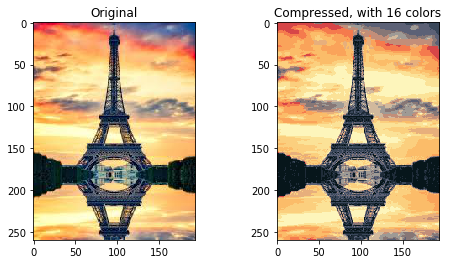

In [31]:
X_recovery = [centroids[idx[i]] for i in range(len(X))]
X_recovery = np.squeeze(np.array(X_recovery)).reshape(size1,size2,3)
fig, ax = plt.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image
ax[1].imshow( (X_recovery*255).astype(int) )
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

The original picture is 260x194x3x8 byte, after K-means, color of one pixel store in 3x8=24 bytes is reduced to 4 bytes (K=16), the photo is compressed 6 times !